# AG3- Actividad Guiada 3 - Metaheurísticas de búsqueda

## Daniel Velásquez

### Repositorio: https://github.com/dfelipe/MIA_AO_AG3

In [1]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random 

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

swiss42.tsp already exists -- do you wish to overwrite (y or n)? ^C


In [2]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41]

In [3]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(0, 1)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)
#print(problem)

15

In [4]:
#Funciones básicas
###############################################################################

#Se genera una solución aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

In [294]:
def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 10000 iteraciones
solucion = busqueda_aleatoria(problem, 10000)

Mejor solución: [0, 37, 31, 34, 33, 18, 1, 36, 16, 14, 12, 10, 21, 23, 7, 6, 20, 27, 2, 17, 5, 22, 8, 24, 40, 39, 41, 25, 30, 9, 29, 11, 4, 3, 15, 38, 13, 19, 32, 35, 26, 28]
Distancia     : 3670


In [297]:
###############################################################################
# BUSQUEDA LOCAL
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt

  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

print("Distancia Solucion Incial:" , distancia_total(solucion, problem))

nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))

Distancia Solucion Incial: 3670
Distancia Mejor Solucion Local: 3323


In [299]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(Nodos)
  mejor_distancia = distancia_total(solucion_referencia, problem)
  print("Punto de partida: ",mejor_distancia)
  print("Nodos de partida: ",solucion_referencia)
    
  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina

sol = busqueda_local(problem )

Punto de partida:  4917
Nodos de partida:  [0, 7, 10, 27, 6, 38, 1, 28, 25, 22, 19, 32, 37, 41, 17, 15, 33, 31, 23, 16, 18, 34, 20, 21, 3, 8, 11, 24, 4, 5, 26, 30, 29, 13, 12, 40, 39, 35, 2, 14, 36, 9]
En la iteracion  37 , la mejor solución encontrada es: [0, 1, 6, 4, 3, 27, 2, 9, 39, 22, 30, 7, 14, 16, 15, 37, 17, 36, 35, 20, 33, 34, 38, 21, 24, 40, 23, 41, 25, 18, 26, 5, 19, 13, 12, 11, 10, 8, 29, 28, 32, 31]
Distancia     : 1704


## Otro mecanismo para ordenar 

Realicé la prueba de agrupar los puntos por cuadrante según las potenciales coordenadas (x,y) que podráin tener los nodos apoyado de la librería sklearn.manifold y utilizando la técnica Multidimensional Scaling (MDS). Esperaba obtener mejores puntos de partida para el algoritmo de búsqueda, pero no hizo diferencia. Posiblemente buscando soluciones por cuadrante y posteriormente utilizando un algortimo genético, se logren obtener mejores resultados. 

In [300]:
# tabla_operaciones.csv contiene valores de "swiss42.tsp" separados por comas para facilitar el uso de la librería MDS
import csv
import os

ruta = os.path.join("res", "Nodos.csv")
nod=[]

with open(ruta) as fichero:
    data_reader = csv.reader(fichero, delimiter=';')
    for linea in data_reader:
        test_list = [int(i) for i in linea]
        nod.append(test_list)


In [305]:
import numpy as np
from sklearn.manifold import MDS

def obtener_coordenadas(distancias):
    # Crear la matriz de distancias
    n = len(distancias)
    matriz_distancias = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matriz_distancias[i, j] = distancias[i][j]
    
    # Aplicar el algoritmo MDS
    mds = MDS(n_components=2, dissimilarity='precomputed')
    coordenadas = mds.fit_transform(matriz_distancias)
    
    # Devolver las coordenadas en formato (x, y)
    coordenadas_nodos = [(coordenadas[i, 0], coordenadas[i, 1]) for i in range(n)]
    return coordenadas_nodos


coordenadas_nodos = obtener_coordenadas(nod)
for i, coordenada in enumerate(coordenadas_nodos):
    print(f"Nodo {i+1}: Coordenadas {coordenada}")


Nodo 1: Coordenadas (-13.487474746814105, 27.274916898178684)
Nodo 2: Coordenadas (-27.134242043611547, 20.668919679674914)
Nodo 3: Coordenadas (-0.4510660678410027, -0.11730493521978087)
Nodo 4: Coordenadas (-10.675960592576173, 4.554994944918765)
Nodo 5: Coordenadas (-17.458102619598257, -4.1327947959819005)
Nodo 6: Coordenadas (-57.57455800860589, -5.806510413129068)
Nodo 7: Coordenadas (-36.295931173866435, 3.6753306628785807)
Nodo 8: Coordenadas (-43.999443841250304, 47.5244480358726)
Nodo 9: Coordenadas (22.919869728230374, -57.45634743280086)
Nodo 10: Coordenadas (48.374778409738965, -68.77962751016332)
Nodo 11: Coordenadas (-5.488366771742136, -64.2261578218326)
Nodo 12: Coordenadas (-41.788095635473475, -78.62415358174509)
Nodo 13: Coordenadas (-39.471170995533996, -65.174846564821)
Nodo 14: Coordenadas (-92.39778977844826, -16.45515869485661)
Nodo 15: Coordenadas (-85.91647909050944, 42.49232112008861)
Nodo 16: Coordenadas (-85.033233532078, 53.80758934555511)
Nodo 17: Coorde

/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


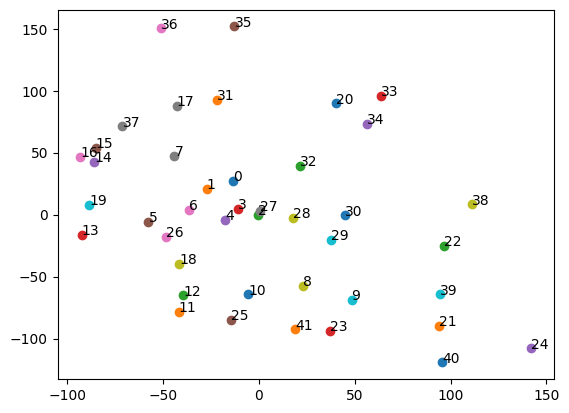

In [329]:
import matplotlib.pyplot as plt

for i, coordenada in enumerate(coordenadas_nodos):
    plt.plot(coordenada[0], coordenada[1], 'o')
    plt.text(coordenada[0], coordenada[1], i, fontsize=10)

plt.show()

In [309]:
def organizar_por_cuadrante(coordenadas):
    cuadrante_1 = []
    cuadrante_1_nodos = []
    cuadrante_2 = []
    cuadrante_2_nodos = []
    cuadrante_3 = []
    cuadrante_3_nodos = []
    cuadrante_4 = []
    cuadrante_4_nodos = []
    nodos=[]

    for i, coordenada in enumerate(coordenadas):
   # for x, y in coordenadas:
        if coordenada[0] >= 0 and coordenada[1] >= 0:
            cuadrante_1.append((coordenada[0], coordenada[1]))
            cuadrante_1_nodos.append(i)
        elif coordenada[0] < 0 and coordenada[1] >= 0:
            cuadrante_2.append((coordenada[0], coordenada[1]))
            cuadrante_2_nodos.append(i)
        elif coordenada[0] < 0 and coordenada[1] < 0:
            cuadrante_3.append((coordenada[0], coordenada[1]))
            cuadrante_3_nodos.append(i)
        else:
            cuadrante_4.append((coordenada[0], coordenada[1]))
            cuadrante_4_nodos.append(i)

    nodos=cuadrante_2_nodos+cuadrante_3_nodos+cuadrante_4_nodos+cuadrante_1_nodos
    return cuadrante_1, cuadrante_2, cuadrante_3, cuadrante_4, nodos

# Ejemplo de uso
coordenadas = [(1, 2), (-3, 4), (-2, -1), (5, -6), (0, 0)]

cuadrante_1, cuadrante_2, cuadrante_3, cuadrante_4, nodos = organizar_por_cuadrante(coordenadas_nodos)

print("Cuadrante 1:", cuadrante_1)
print("Cuadrante 2:", cuadrante_2)
print("Cuadrante 3:", cuadrante_3)
print("Cuadrante 4:", cuadrante_4)
print("Nodos: ", nodos)

Cuadrante 1: [(40.030589604875466, 89.879903243727), (0.45474854381031005, 3.3015383359430643), (21.345637648777164, 39.35123544584987), (63.575629332174444, 96.10427668333442), (56.42231864409513, 73.33815768810408), (111.2110145671811, 8.216566129097226)]
Cuadrante 2: [(-13.487474746814105, 27.274916898178684), (-27.134242043611547, 20.668919679674914), (-10.675960592576173, 4.554994944918765), (-36.295931173866435, 3.6753306628785807), (-43.999443841250304, 47.5244480358726), (-85.91647909050944, 42.49232112008861), (-85.033233532078, 53.80758934555511), (-93.13705174681255, 46.42271033739997), (-42.777898893032415, 87.91178847429646), (-88.5973763123617, 7.892748461027574), (-22.06247208642956, 92.80635406586083), (-12.69284588034426, 151.78682703183424), (-51.210965761726094, 150.41388405379985), (-71.13215709064778, 71.13979682542403)]
Cuadrante 3: [(-0.4510660678410027, -0.11730493521978087), (-17.458102619598257, -4.1327947959819005), (-57.57455800860589, -5.806510413129068), (

In [328]:
#Busqueda Local:
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def nueva_busqueda_local(n_cuadra,problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  solucion_referencia = crear_solucion(n_cuadra)
  mejor_distancia = distancia_total(solucion_referencia, problem)
  print("Punto de partida: ",mejor_distancia)
  print("Nodos de partida: ",solucion_referencia)
    
  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(iteracion<100):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = nueva_busqueda_local(nodos, problem )

Punto de partida:  4896
Nodos de partida:  [0, 40, 11, 18, 2, 19, 10, 15, 39, 31, 20, 9, 30, 13, 5, 17, 14, 6, 41, 28, 35, 4, 36, 38, 24, 27, 1, 23, 21, 7, 33, 37, 8, 29, 34, 25, 3, 22, 12, 32, 26, 16]
En la iteracion  38 , la mejor solución encontrada es: [0, 4, 11, 12, 18, 26, 16, 14, 7, 31, 20, 34, 32, 6, 5, 13, 19, 15, 37, 17, 36, 35, 33, 38, 22, 39, 9, 23, 21, 24, 40, 41, 25, 10, 8, 29, 30, 28, 2, 27, 3, 1]
Distancia     : 1664
